
# Step 1: Installing Libraries


In [21]:
!pip install pathway bokeh --quiet # This cell may take a few seconds to execute.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import pathway as pw
import bokeh.plotting
import panel as pn

# Step 2: Load & Clean the Data


In [33]:
# Upload dataset.csv via Colab's file upload tool or mount from drive
df = pd.read_csv('dataset.csv')

# Parse timestamp from date + time
df['Timestamp'] = pd.to_datetime(df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'], dayfirst=True)

# Calculate occupancy rate
df['OccupancyRate'] = df['Occupancy'] / df['Capacity']

df

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,Timestamp,OccupancyRate
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00,2016-10-04 07:59:00,0.105719
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00,2016-10-04 08:25:00,0.110919
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00,2016-10-04 08:59:00,0.138648
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00,2016-10-04 09:32:00,0.185442
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00,2016-10-04 09:59:00,0.259965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,18363,Shopping,1920,26.150504,91.733531,1517,truck,average,6,0,19-12-2016,14:30:00,2016-12-19 14:30:00,0.790104
18364,18364,Shopping,1920,26.150504,91.733531,1487,car,low,3,0,19-12-2016,15:03:00,2016-12-19 15:03:00,0.774479
18365,18365,Shopping,1920,26.150504,91.733531,1432,cycle,low,3,0,19-12-2016,15:29:00,2016-12-19 15:29:00,0.745833
18366,18366,Shopping,1920,26.150504,91.733531,1321,car,low,2,0,19-12-2016,16:03:00,2016-12-19 16:03:00,0.688021


# Step 3: Model 1 – Baseline Linear Pricing

In [34]:
# Set parameters
alpha = 5
base_price = 10

# Model 1 price per lot
model1_all = []

for lot in df['SystemCodeNumber'].unique():
    temp = df[df['SystemCodeNumber'] == lot].sort_values('Timestamp').copy()
    temp['Model1_Price'] = base_price
    for i in range(1, len(temp)):
        prev_price = temp.iloc[i-1]['Model1_Price']
        occ_rate = temp.iloc[i]['OccupancyRate']
        temp.at[temp.index[i], 'Model1_Price'] = round(prev_price + alpha * occ_rate, 2)
    model1_all.append(temp)

model1_df = pd.concat(model1_all)
model1_df

/tmp/ipython-input-34-3044465639.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '11.67' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  temp.at[temp.index[i], 'Model1_Price'] = round(prev_price + alpha * occ_rate, 2)
/tmp/ipython-input-34-3044465639.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '11.85' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  temp.at[temp.index[i], 'Model1_Price'] = round(prev_price + alpha * occ_rate, 2)
/tmp/ipython-input-34-3044465639.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '12.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  temp.at[temp.index[i], 'Model1_Price'] = rou

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,Timestamp,OccupancyRate,Model1_Price
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00,2016-10-04 07:59:00,0.105719,10.00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00,2016-10-04 08:25:00,0.110919,10.55
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00,2016-10-04 08:59:00,0.138648,11.24
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00,2016-10-04 09:32:00,0.185442,12.17
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00,2016-10-04 09:59:00,0.259965,13.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,18363,Shopping,1920,26.150504,91.733531,1517,truck,average,6,0,19-12-2016,14:30:00,2016-12-19 14:30:00,0.790104,3639.70
18364,18364,Shopping,1920,26.150504,91.733531,1487,car,low,3,0,19-12-2016,15:03:00,2016-12-19 15:03:00,0.774479,3643.57
18365,18365,Shopping,1920,26.150504,91.733531,1432,cycle,low,3,0,19-12-2016,15:29:00,2016-12-19 15:29:00,0.745833,3647.30
18366,18366,Shopping,1920,26.150504,91.733531,1321,car,low,2,0,19-12-2016,16:03:00,2016-12-19 16:03:00,0.688021,3650.74


# Step 4: Model 2 – Demand-Based Pricing

In [35]:
# Encode categorical variables
traffic_map = {'low': 1, 'average': 2, 'high': 3}
vehicle_weights = {'car': 1.0, 'bike': 0.6, 'truck': 1.5, 'cycle': 0.3}
df['TrafficLevel'] = df['TrafficConditionNearby'].map(traffic_map)
df['VehicleWeight'] = df['VehicleType'].map(vehicle_weights)

# Demand function coefficients
α, β, γ, δ, ε = 0.5, 0.2, 0.3, 1.0, 0.1

# Compute raw demand
df['RawDemand'] = (
    α * df['OccupancyRate'] +
    β * df['QueueLength'] -
    γ * df['TrafficLevel'] +
    δ * df['IsSpecialDay'] +
    ε * df['VehicleWeight']
)

# Normalize demand
df['NormalizedDemand'] = (df['RawDemand'] - df['RawDemand'].min()) / (df['RawDemand'].max() - df['RawDemand'].min())

# Apply Model 2 pricing
λ = 1.0
df['Model2_Price'] = round(10 * (1 + λ * df['NormalizedDemand']), 2)


# Step 5: Model 3 – Competitive Pricing

In [36]:
## Model 3: Competitive Pricing
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    dlat, dlon = radians(lat2-lat1), radians(lon2-lon1)
    a = sin(dlat/2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2)**2
    return 2 * R * asin(sqrt(a))

lot_locations = df.groupby('SystemCodeNumber')[['Latitude', 'Longitude']].first()
nearby_lots = {}
for lot1 in lot_locations.index:
    nearby_lots[lot1] = [
        lot2 for lot2 in lot_locations.index if lot1 != lot2 and
        haversine(*lot_locations.loc[lot1], *lot_locations.loc[lot2]) <= 0.5
    ]

df['Model3_Price'] = df['Model2_Price']
for idx, row in df.iterrows():
    lot = row['SystemCodeNumber']
    time = row['Timestamp']
    occ = row['OccupancyRate']
    base_price = row['Model2_Price']

    if occ > 0.9 and nearby_lots.get(lot):
        comp_prices = df[(df['SystemCodeNumber'].isin(nearby_lots[lot])) & (df['Timestamp'] == time)]['Model2_Price']
        if not comp_prices.empty:
            min_price = comp_prices.min()
            df.at[idx, 'Model3_Price'] = round(base_price * 0.95 if min_price < base_price else base_price * 1.05, 2)


# Step 6: Bokeh Interactive Dashboard

In [38]:
# Select initial lot
lot_codes = df['SystemCodeNumber'].unique().tolist()
initial = lot_codes[0]

def get_lot_data(lot):
    temp = df[df['SystemCodeNumber'] == lot].sort_values('Timestamp')
    return dict(
        x=temp['Timestamp'],
        m1=temp['Model1_Price'] if 'Model1_Price' in temp else temp['Model2_Price'],
        m2=temp['Model2_Price'],
        m3=temp['Model3_Price'],
    )

source = ColumnDataSource(data=get_lot_data(initial))

p = figure(x_axis_type='datetime', width=800, height=400, title=f"Pricing Models for Lot {initial}")
p.line('x', 'm1', source=source, color='blue', legend_label='Model 1')
p.line('x', 'm2', source=source, color='green', legend_label='Model 2')
p.line('x', 'm3', source=source, color='red', legend_label='Model 3')

hover = HoverTool(
    tooltips=[("Time", "@x{%F %T}"), ("M1", "@m1"), ("M2", "@m2"), ("M3", "@m3")],
    formatters={'@x': 'datetime'},
    mode='vline'
)
p.add_tools(hover)

select = Select(title="Parking Lot", value=initial, options=lot_codes)
def update(attr, old, new): source.data = get_lot_data(select.value)
select.on_change('value', update)

show(column(select, p))


You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/js_callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html



# Step 7: Pathway Real-Time Streaming + Pricing Engine

In [39]:
!pip install pathway


Step 7.2: Create Your Pathway App Structure

In [65]:
import pathway as pw
import pandas as pd
import numpy as np

# Read input data
class ParkingSchema(pw.Schema):
    SystemCodeNumber: str
    Capacity: int
    Latitude: float
    Longitude: float
    Occupancy: int
    VehicleType: str
    TrafficConditionNearby: str
    QueueLength: int
    IsSpecialDay: int
    LastUpdatedDate: str
    LastUpdatedTime: str

# Load static file as a stream
input_table = pw.io.csv.read(
    "dataset.csv",
    schema=ParkingSchema,
    mode="streaming",
    autocommit_duration_ms=50
)

# Step 1: Combine date + time and compute occupancy rate
@pw.udf
def compute_timestamp(date, time):
    return pd.to_datetime(date + ' ' + time, dayfirst=True)

@pw.udf
def occupancy_rate(occ, cap):
    return occ / cap

# Step 2: Apply basic encoding
@pw.udf
def traffic_level(level):
    return {"low": 1, "average": 2, "high": 3}.get(level, 2)

@pw.udf
def vehicle_weight(type):
    return {"car": 1.0, "bike": 0.6, "truck": 1.5, "cycle": 0.3}.get(type, 1.0)

# Step 3: Demand function
@pw.udf
def demand(occ_rate, queue, traffic, special, weight):
    return (0.5 * occ_rate +
            0.2 * queue -
            0.3 * traffic +
            1.0 * special +
            0.1 * weight)

# Step 4: Final pricing
@pw.udf
def price_function(raw_demand):
    norm = max(min((raw_demand - 0) / (5 - 0), 1), 0)  # assume range ~[0, 5]
    return round(10 * (1 + norm), 2)

# Build app pipeline
output_table = input_table.with_columns(
    Timestamp=compute_timestamp(input_table.LastUpdatedDate, input_table.LastUpdatedTime),
    OccRate=occupancy_rate(input_table.Occupancy, input_table.Capacity),
    TrafficLevel=traffic_level(input_table.TrafficConditionNearby),
    VehicleWeight=vehicle_weight(input_table.VehicleType)
).with_columns(
    Demand=demand(
        pw.this.OccRate,
        pw.this.QueueLength,
        pw.this.TrafficLevel,
        pw.this.IsSpecialDay,
        pw.this.VehicleWeight
    )
).with_columns(
    Price=price_function(pw.this.Demand)
)

# Step 5: Output result
pw.io.jsonlines.write(
    output_table.select(
        pw.this.SystemCodeNumber,
        pw.this.Timestamp,
        pw.this.Price
    ),
    "output_stream.jsonl"
)


# Launch app
pw.run()


Output()

/usr/local/lib/python3.11/dist-packages/beartype/_util/hint/pep/utilpeptest.py:311: BeartypeDecorHintPep585DeprecationWarning: PEP 484 type hint typing.Iterable[pathway.internals.expression.ColumnReference] deprecated by PEP 585. This hint is scheduled for removal in the first Python version released after October 5th, 2025. To resolve this, import this hint from "beartype.typing" rather than "typing". For further commentary and alternatives, see also:
    https://beartype.readthedocs.io/en/latest/api_roar/#pep-585-deprecations
  warn(


KeyboardInterrupt: 

# Plug Pathway Output into Bokeh Live Plotting

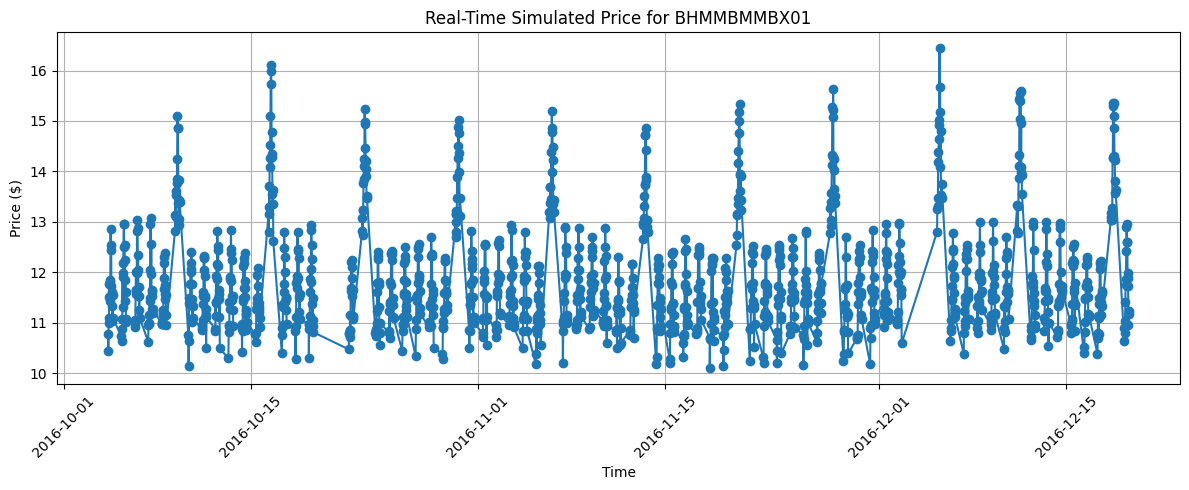

In [66]:
# Load the streamed output file
df_stream = pd.read_json('output_stream.jsonl', lines=True)
df_stream['Timestamp'] = pd.to_datetime(df_stream['Timestamp'])

# Choose a lot to simulate
selected_lot = df_stream['SystemCodeNumber'].unique()[0]
lot_df = df_stream[df_stream['SystemCodeNumber'] == selected_lot].sort_values('Timestamp')

# Plot price over time
plt.figure(figsize=(12, 5))
plt.plot(lot_df['Timestamp'], lot_df['Price'], marker='o')
plt.title(f"Real-Time Simulated Price for {selected_lot}")
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
